# Forbes Richest Athletes
### Este notebook realiza uma análise exploratória a respeito de uma base de dados que contém informações dos atletas mais ricos segundo a FORBES.

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


# Descrição dos dados

In [86]:
df.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


Tipo de cada coluna

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


Tamanho do dataset

In [88]:
len(df)

301

Quantidade de valores duplicados

In [89]:
df.duplicated().sum()

0

Quantidade de valores nulos

In [90]:
df.isna().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

## Perguntas de partida e hipóteses

1. Quais são os esportes com mais atletas na revista forbes?
2. Quais são os atletas mais ricos?
3. Qual paises tem mais atletas na revista forbes?
4. Qual a distribuição de renda dos atletas nos ultimos 5 anos?
5. Qual a distribuição de renda dos atletas nos 5 paises que mais se repetem?
6. Quais atletas mais se repetem na forbes? e o historico de sua renda?

## Insights

### 1. Quais são os esportes com mais atletas na revista forbes?

Quais são so esportes mais jogados pelos atletas mais ricos?

In [91]:
df["Sport"].unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

Note que alguns esportes se repetem pq estão escritos de forma diferente. Para resolver este problema vamos considerar strings no formato lowercase.

In [92]:
df["Sport"] = df["Sport"].str.lower()
df["Sport"].unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'tennis', 'nfl',
       'nba', 'baseball', 'ice hockey', 'american football / baseball',
       'f1 motorsports', 'nascar', 'hockey', 'auto racing (nascar)',
       'f1 racing', 'american football', 'soccer', 'cycling',
       'motorcycle gp', 'mma'], dtype=object)

In [93]:
df["Sport"].value_counts()

basketball                      81
boxing                          46
golf                            44
soccer                          33
tennis                          23
auto racing                     18
american football               17
f1 racing                        8
baseball                         6
f1 motorsports                   5
motorcycle gp                    4
nascar                           3
ice hockey                       3
nfl                              3
auto racing (nascar)             2
american football / baseball     1
hockey                           1
nba                              1
cycling                          1
mma                              1
Name: Sport, dtype: int64

#### Esportes mais jogados


In [94]:
data = df["Sport"].value_counts().reset_index()
data = data.nlargest(5, 'Sport')

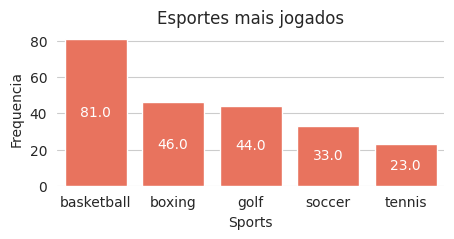

In [95]:
sns.set_style("whitegrid")
plt.figure(figsize=(5, 2))
ax = sns.barplot(data=data, x='index', y='Sport', color='tomato')
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='white'
)
plt.xlabel('Sports')
plt.ylabel('Frequencia')
plt.title('Esportes mais jogados')
ax.set(frame_on=False)
plt.show()

### 2. Quais são os atletas mais ricos?

In [96]:
data = df.nlargest(5, "earnings ($ million)")
data

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,242,Floyd Mayweather,USA,1,1,boxing,2015,300.0
271,272,Floyd Mayweather,USA,1,>100,boxing,2018,285.0
242,243,Manny Pacquiao,Philippines,2,11,boxing,2015,160.0
281,282,Lionel Messi,Argentina,1,2,soccer,2019,127.0
171,172,Tiger Woods,USA,1,1,golf,2008,115.0


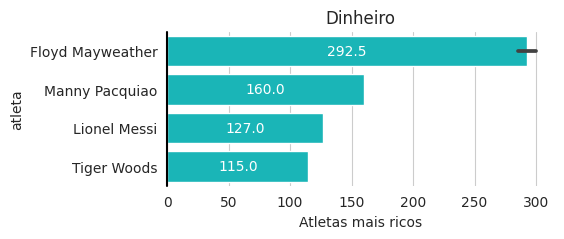

In [97]:
sns.set_style("whitegrid")
plt.figure(figsize=(5, 2))
ax = sns.barplot(data=data, x='earnings ($ million)', y='Name', color='darkturquoise')
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='white'
)
plt.xlabel('Atletas mais ricos')
plt.ylabel('atleta')
plt.title('Dinheiro')
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.show()

### 3. Qual pais tem mais atletas na revista forbes?

In [98]:
df["Nationality"].value_counts()

USA                 206
UK                   13
Germany              13
Switzerland          12
Portugal             10
Brazil                9
Argentina             9
Canada                6
Italy                 4
Finland               3
France                3
Philippines           3
Russia                1
Australia             1
Dominican             1
Austria               1
Filipino              1
Spain                 1
Serbia                1
Northern Ireland      1
Ireland               1
Mexico                1
Name: Nationality, dtype: int64

In [99]:
data = df["Nationality"].value_counts().reset_index()
data = data.nlargest(5, "Nationality")
data

,index,Nationality
0,USA,206
1,UK,13
2,Germany,13
3,Switzerland,12
4,Portugal,10


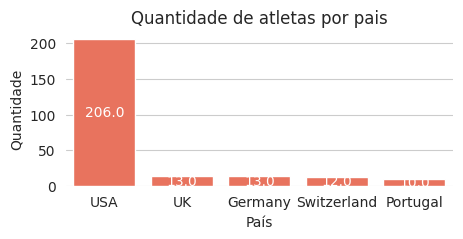

In [100]:
sns.set_style("whitegrid")
plt.figure(figsize=(5, 2))
ax = sns.barplot(data=data, x='index', y='Nationality', color='tomato')
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='white'
)
plt.xlabel('País')
plt.ylabel('Quantidade')
plt.title('Quantidade de atletas por pais')
ax.set(frame_on=False)
plt.show()

### 4. Qual a distribuição de renda dos atletas nos ultimos 5 anos?

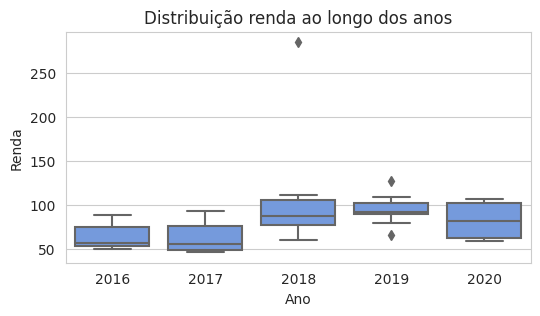

In [101]:
data = df[df['Year']>2015]
sns.set_style("whitegrid")
plt.figure(figsize=(6, 3))
ax = sns.boxplot(x="Year", y="earnings ($ million)", data=data, color='cornflowerblue')
plt.xlabel('Ano')
plt.ylabel('Renda')
plt.title('Distribuição renda ao longo dos anos')
plt.show()

### 5. Qual a distribuição de renda dos atletas nos ultimos 5 paises que mais se repetem?

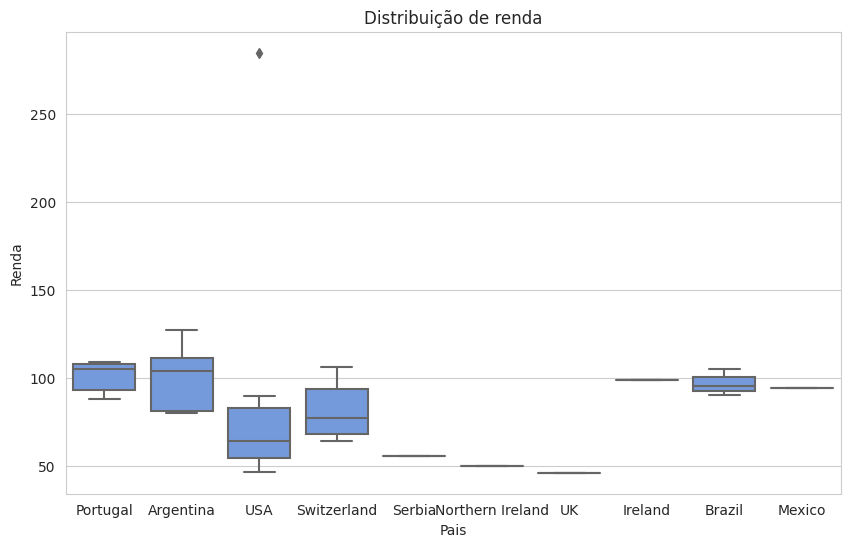

In [102]:
#data = df[df['Year']>2015]
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Nationality", y="earnings ($ million)", data=data, color='cornflowerblue')
plt.xlabel('Pais')
plt.ylabel('Renda')
plt.title('Distribuição de renda')
plt.show()

### 6. Quais atletas mais se repetem na forbes? e o historico de sua renda?

In [104]:
data = df["Name"].value_counts().reset_index()
data = data.nlargest(5, 'Name')

In [106]:
data

,index,Name
0,Tiger Woods,19
1,Michael Jordan,19
2,Kobe Bryant,14
3,LeBron James,13
4,Michael Schumacher,13


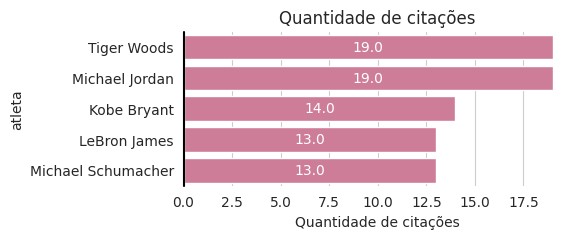

In [109]:
sns.set_style("whitegrid")
plt.figure(figsize=(5, 2))
ax = sns.barplot(data=data, x='Name', y='index', color='palevioletred')
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='white'
)
plt.xlabel('Quantidade de citações')
plt.ylabel('atleta')
plt.title('Quantidade de citações')
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.show()

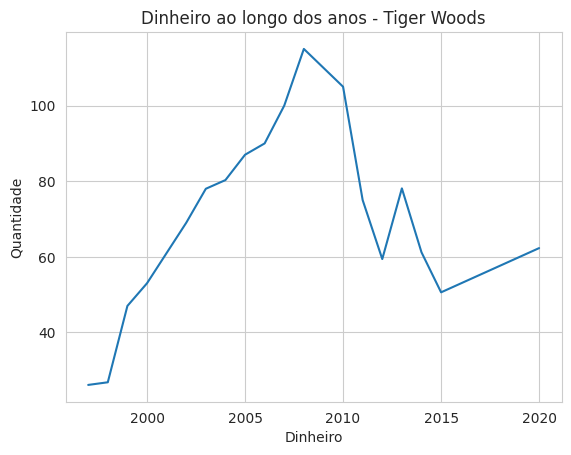

In [121]:
data = df[df['Name']=='Tiger Woods']
sns.lineplot(data=data, x="Year", y="earnings ($ million)")
plt.ylabel('Quantidade')
plt.xlabel('Dinheiro')
plt.title('Dinheiro ao longo dos anos - Tiger Woods')
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()

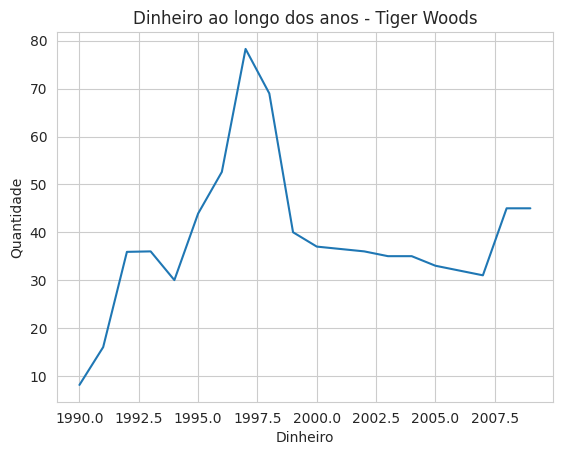

In [122]:
data = df[df['Name']=='Michael Jordan']
sns.lineplot(data=data, x="Year", y="earnings ($ million)")
plt.ylabel('Quantidade')
plt.xlabel('Dinheiro')
plt.title('Dinheiro ao longo dos anos - Michael Jordan')
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()